In [1]:
# Add all the imports for data visualization and machine-learning
import sklearn  
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Load the csv file into a pandas dataframe
df = pd.read_csv('WineQT.csv')

In [3]:
# Check the data types for each of the rows
print('------------Data types of each column---------------')
print(df.info())

------------Data types of each column---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [4]:
# Print out the first 5 rows just to Check view
print('------------First Five Rows---------------')
print(df.iloc[0:5,:])

------------First Five Rows---------------
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4       

In [5]:
#Data Visualization
#Drop ID Column because it is irrelevant
df=df.drop(columns=['Id'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB
None


In [6]:
# Describe the Dataset and check what (if any) values are null
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# Check how many values in each column are null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64


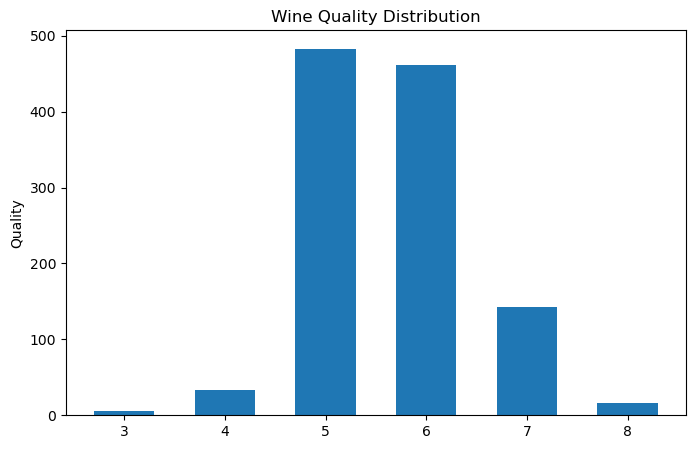

In [8]:
#Distribution of Wine Qualities
counts = df['quality'].value_counts()
print(counts)
x=[5,6,7,4,8,3]

plt.figure(figsize=(8,5))
plt.bar(x,height=counts,width=.6)
plt.ylabel("Quality")
plt.title("Wine Quality Distribution")
plt.show()

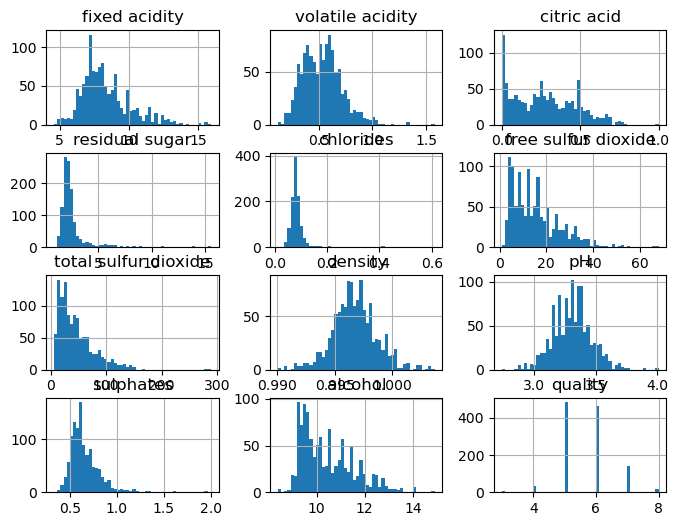

In [9]:
df.hist(bins=50,figsize=(8,6))
plt.show()

<AxesSubplot:>

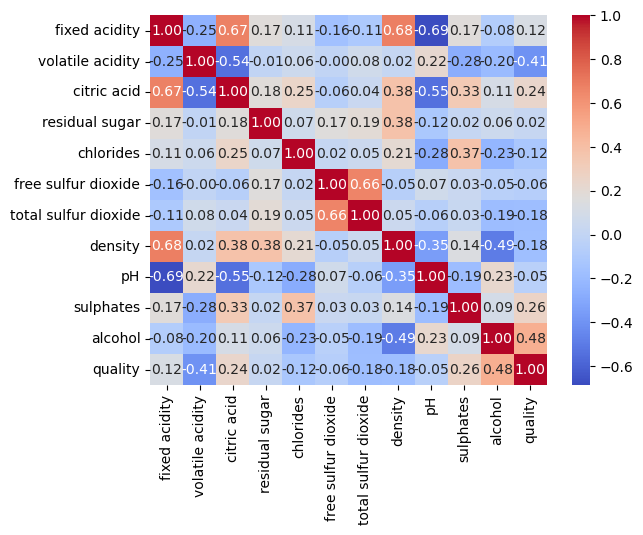

In [10]:
# Correlation heatmap
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap = "coolwarm", annot=True, fmt=".2f")
# Correlation between quality and residual sugar, free sulfer dioxide, or pH are all low (absolute value < 0.1)
# With that in mind we consider dropping these columns from the table
#df = df.drop(columns=["residual sugar"])
#df = df.drop(columns=["free sulfur dioxide"])
#df = df.drop(columns=["pH"])

In [11]:
# Split data into test, train and validation set
from sklearn.model_selection import train_test_split

#Get input features and output variables
X=df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]]
y=df.iloc[:,[11]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) 

In [12]:
# Neural Network imports
import tensorflow as tf
from tensorflow import keras

2023-04-24 22:36:28.723425: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
#Test Neural Networks

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


model = keras.models.Sequential()
print(X_train.shape[1])

# The Input Layer :
model.add(keras.layers.Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))


# The Hidden Layers :
model.add(keras.layers.Dense(250,kernel_initializer='normal', activation="relu"))
model.add(keras.layers.Dense(250,kernel_initializer='normal', activation="relu"))
model.add(keras.layers.Dense(250, kernel_initializer='normal',activation="relu"))

# The Output Layer :
model.add(keras.layers.Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])


11


In [14]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 250)               32250     
                                                                 
 dense_2 (Dense)             (None, 250)               62750     
                                                                 
 dense_3 (Dense)             (None, 250)               62750     
                                                                 
 dense_4 (Dense)             (None, 1)                 251       
                                                                 
Total params: 159,537
Trainable params: 159,537
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train, y_train, epochs=50,validation_data=(X_val, y_val))

Epoch 1/50
22/22 [==============================] - 1s 11ms/step - loss: 9.1784 - mean_squared_error: 9.1784 - val_loss: 2.1436 - val_mean_squared_error: 2.1436
Epoch 2/50
22/22 [==============================] - 0s 4ms/step - loss: 1.0221 - mean_squared_error: 1.0221 - val_loss: 0.8012 - val_mean_squared_error: 0.8012
Epoch 3/50
22/22 [==============================] - 0s 4ms/step - loss: 0.6584 - mean_squared_error: 0.6584 - val_loss: 0.6423 - val_mean_squared_error: 0.6423
Epoch 4/50
22/22 [==============================] - 0s 5ms/step - loss: 0.5476 - mean_squared_error: 0.5476 - val_loss: 0.6350 - val_mean_squared_error: 0.6350
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 0.5651 - mean_squared_error: 0.5651 - val_loss: 0.6451 - val_mean_squared_error: 0.6451
Epoch 6/50
22/22 [==============================] - 0s 4ms/step - loss: 0.5231 - mean_squared_error: 0.5231 - val_loss: 0.5775 - val_mean_squared_error: 0.5775
Epoch 7/50
22/22 [=====================